In [1]:
from option import args
import torch
import utility
import data
import utils
import model
import loss
from trainer import Trainer
import os
from torch.utils.tensorboard import SummaryWriter
import numpy as np


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


number of common Subjects  171


In [2]:
args.no_vols = 2
args.test_vols = 2
args.tv_en = True
np.random.seed(args.seed)
ids = utils.get_ids()
# ids.sort()
total_vols = args.no_vols+args.test_vols
ids.sort()
ids = ids[:total_vols]
ids = np.random.choice(ids,total_vols,replace = False)

In [3]:
print(ids)
if(args.model_type == '2d'):
    args.block_size = (32,32,1)

if (args.run_name == '..'):
    args.run_name = f"{args.model}{args.model_type},{args.encoder},{args.no_vols}_train,{args.test_vols}_test,growth{args.growth},loss_{args.loss},start_var_{args.start_var},batch_size{args.batch_size}"
else:
    args.run_name = f"{args.model}{args.model_type},{args.encoder},{args.no_vols}_train,{args.test_vols}_test,growth{args.growth},loss_{args.loss},start_var_{args.start_var},batch_size{args.batch_size},{args.run_name}"
print(args.run_name)

['104416' '102816' '100610' '102311']
dmri_rdn3d,rdb,2_train,2_test,growth32,loss_1*MSE,start_var_True,batch_size16


In [4]:
torch.manual_seed(args.seed)
checkpoint = utility.checkpoint(args)       ## setting the log and the train information
if checkpoint.ok:
    print("ok")

ok


In [26]:
loader = data.Data(args,ids= ids)  
logger = SummaryWriter('runs/'+ "jupyter")

Loading Done


In [27]:
loader

In [28]:
for batch, (lr,hr,scale,tv) in enumerate(loader.training_data):
    lr_tensor = lr.squeeze().to('cuda').float()  # ranges from [0, 1]
    hr_tensor = hr.squeeze().to('cuda').float()  # ranges from [0, 1]
#     tv_tensor = tv.squeeze().to('cuda').float()  # ranges from [0, 1]
    # print(lr_tensor.shape,hr_tensor.shape,scale)
    sca = np.asarray(scale[0,:])
#     break
    print(batch)

0
1
2
3
4
5
6
7
8
9
10
11


In [38]:
lr[lr>1]

tensor([])

In [53]:
np.asarray(lr>1).any() and np.asarray(lr<0).any()

False

In [55]:
np.asarray(lr>0).all() and np.asarray(lr<1).all()

False

In [41]:
lr>1 or lr<0

tensor([[[[[[False, False, False,  ..., False, False, False],
            [False, False, False,  ..., False, False, False],
            [False, False, False,  ..., False, False, False],
            ...,
            [False, False, False,  ..., False, False, False],
            [False, False, False,  ..., False, False, False],
            [False, False, False,  ..., False, False, False]],

           [[False, False, False,  ..., False, False, False],
            [False, False, False,  ..., False, False, False],
            [False, False, False,  ..., False, False, False],
            ...,
            [False, False, False,  ..., False, False, False],
            [False, False, False,  ..., False, False, False],
            [False, False, False,  ..., False, False, False]],

           [[False, False, False,  ..., False, False, False],
            [False, False, False,  ..., False, False, False],
            [False, False, False,  ..., False, False, False],
            ...,
            [Fa

In [44]:
(lr>1).shape

torch.Size([1, 16, 41, 5, 26, 7])

In [7]:
lr_tensor.shape,hr_tensor.shape,scale

(torch.Size([16, 33, 27, 6, 7]),
 torch.Size([16, 40, 30, 7, 5]),
 tensor([[1.2000, 1.1000, 1.1000]], dtype=torch.float64))

In [8]:
sca

array([1.2, 1.1, 1.1])

In [9]:
tv[0].shape

torch.Size([1, 133, 177, 113, 6])

In [19]:
args.encoder = "Conv"

In [23]:
args.model = 'dmri_arb'

In [24]:
curr_model = model.Model(args)


Making model... here


In [25]:
curr_model

Model(
  (model): DMRI_arb(
    (encoder): RDN(
      (SFENet1): Conv3d(7, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (SFENet2): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
      (RDBs): ModuleList(
        (0-4): 5 x RDB(
          (convs): Sequential(
            (0): ConvBlock_3d(
              (layers): Sequential(
                (0): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
                (1): InstanceNorm3d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
                (2): ReLU()
                (3): Dropout3d(p=0, inplace=False)
              )
            )
            (1): ConvBlock_3d(
              (layers): Sequential(
                (0): Conv3d(64, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
                (1): InstanceNorm3d(32, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
                (2): ReLU()
             

In [12]:
lr = torch.permute(lr_tensor, (0,4,1,2,3))

In [13]:
lr.shape

torch.Size([16, 7, 33, 27, 6])

In [14]:
sca

array([1.2, 1.1, 1.1])

In [15]:
out = model.forward(lr,sca)

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3516.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [17]:
out.shape

torch.Size([16, 5, 40, 30, 7])

In [18]:
from torchviz import make_dot

In [19]:
out = model.forward(lr,sca)

In [20]:
out.mean()

tensor(0.1010, device='cuda:0', grad_fn=<MeanBackward0>)

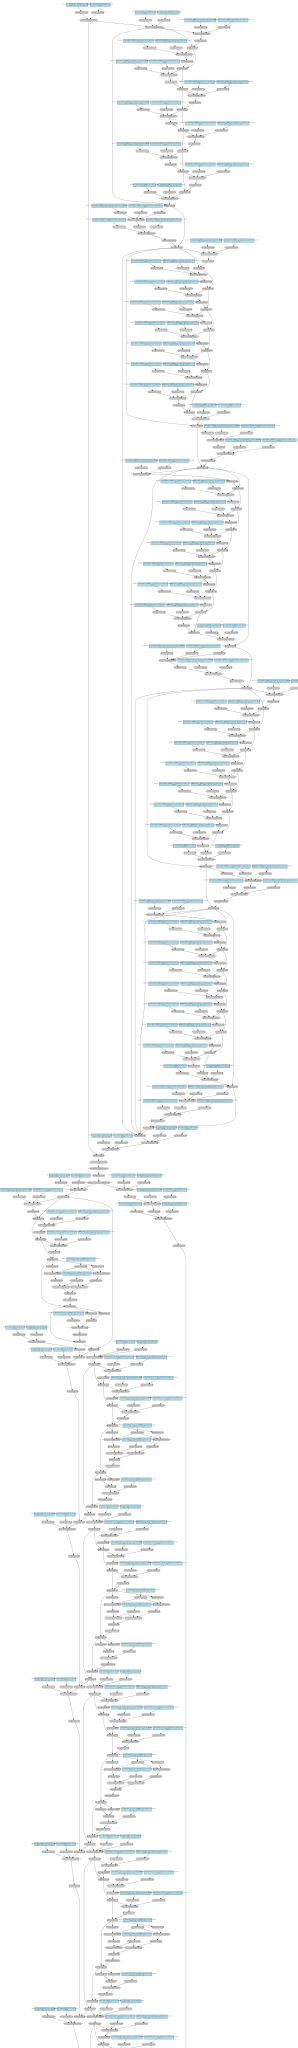

In [21]:
make_dot(out.mean(), params=dict(model.named_parameters()))

In [ ]:
writer.add_graph(net, images)

In [28]:
hr_tensor.shape

torch.Size([16, 40, 30, 7, 5])

In [22]:
out[1].shape

torch.Size([16, 6, 40, 30, 7])

In [24]:
tv[0].shape

torch.Size([1, 133, 177, 113, 6])

In [7]:
        
        loss = loss.Loss(args, checkpoint)
        t = Trainer(args, loader, model, loss, checkpoint,logger)
        while not t.terminate():
            t.train()
            t.test()
            # break

        # checkpoint.done()



array(['104416', '102816', '100610', '102311'], dtype='<U6')

In [8]:
loader = data.Data(args,ids= ids)

Loading Done


In [10]:
tv[0]

tensor([[[[[0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0.],
           ...,
           [0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0.]],

          [[0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0.],
           ...,
           [0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0.]],

          [[0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0.],
           ...,
           [0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0.]],

          ...,

          [[0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0.],
           ...,
           [0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0.],
           [0., 0., 0., 0., 0., 0.]],

          [[0., 0., 0., 

In [14]:
tv[0].size()

torch.Size([1, 133, 177, 113, 6])

In [17]:
tv[1]

('100610',)

In [18]:
torch.histogram(tv[0])

torch.return_types.histogram(
hist=tensor([1.0000e+00, 0.0000e+00, 0.0000e+00, 2.6400e+02, 1.2294e+07, 3.1029e+06,
        3.9089e+05, 1.6731e+05, 5.5430e+03, 1.6000e+01, 1.3000e+01, 9.0000e+00,
        6.0000e+00, 0.0000e+00, 3.0000e+00, 0.0000e+00, 3.0000e+00, 3.0000e+00,
        3.0000e+00, 4.0000e+00, 2.0000e+00, 5.0000e+00, 4.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
     

In [10]:
tv[1]

('102311',)

In [17]:
tv[0].shape

torch.Size([1, 133, 177, 113, 6])

In [18]:
batch, (lr.shape,hr.shape,scale,tv.shape)

AttributeError: 'list' object has no attribute 'shape'

In [11]:
batch, (lr_tensor.shape,hr_tensor.shape,scale,tv_tensor.shape)

(0,
 (torch.Size([16, 32, 32, 4, 7]),
  torch.Size([16, 42, 42, 5, 5]),
  tensor([[1.2000, 1.1000, 1.1000]], dtype=torch.float64),
  torch.Size([16, 42, 42, 5, 6])))

In [22]:
np.unique(tv_tensor.cpu())

array([0.05404305, 0.05469534, 0.055117  , ..., 0.36352447, 0.36451533,
       0.39078027], dtype=float32)

In [1]:
from dipy.viz import window, actor